# Ames Housing - Jacopo Belardo

1.	 Import the Numpy, Pandas, Matplotlib, and Scikit-Learn libraries

In [1]:
#import packages
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, metrics

2.	Make sure your working directory is set correctly.

In [2]:
os.getcwd()

'C:\\Users\\jacbe\\OneDrive\\Desktop\\Portfolio'

3.	Import the Ames Housing data set into a pandas array.

In [4]:
ames = pd.read_csv("AmesHousing.csv", sep=",", header=0, engine='python')

In [5]:
ames.shape

(2930, 82)

In [6]:
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [8]:
# remove columns with many Null values
remove_cols = ['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']

In [9]:
ames = ames.drop(columns = remove_cols)

In [10]:
ames = ames.dropna()

In [11]:
ames.shape

(2218, 76)

4.	Choose and set a target variable from the Ames data set.  The target variable you choose should be binary.

In [12]:
# designate target variable name
targetName = 'Central Air'
#print(targetName)
targetSeries = ames[targetName]
#print(targetSeries)
print(targetSeries)

0       Y
1       Y
2       Y
3       Y
4       Y
       ..
2923    Y
2924    Y
2925    Y
2928    Y
2929    Y
Name: Central Air, Length: 2218, dtype: object


5.	View the distribution of your target variable in a bar chart.

Central Air
N     110
Y    2108
Name: Central Air, dtype: int64


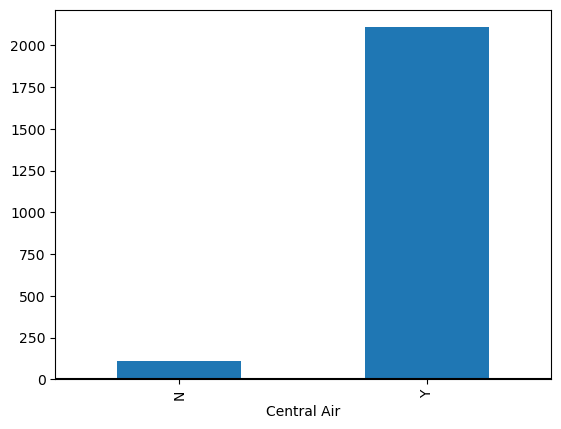

In [13]:
#Basic bar chart since the target is binominal
groupby = ames.groupby(targetName)
targetEDA=groupby[targetName].aggregate(len)
print(targetEDA)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

6.	Move your target variable to the front of your data frame.

In [14]:
#remove target from current location and insert in column number 0
del ames[targetName]
ames.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
ames.head(5)

,Central Air,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,Y,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,Y,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,Y,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,Y,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,Y,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,...,0,0,0,0,0,3,2010,WD,Normal,189900


7.	Change the target variable type to numeric (if it’s not already).  Change any other categorical variables to dummy variables.

In [15]:
# Turn a character/text target variable into numeric one
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
ames['Central Air'] = le_dep.fit_transform(ames['Central Air'])

# perform data transformation. Creates dummy variables for categorical variables. 
for col in ames.columns[1:]:
	attName = col
	dType = ames[col].dtype
	missing = pd.isnull(ames[col]).any()
	uniqueCount = len(ames[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df = pd.concat([ames, pd.get_dummies(ames[col], prefix=col)], axis=1)
		del ames[attName]

In [16]:
ames.columns

Index(['Central Air', 'Order', 'PID', 'MS SubClass', 'Lot Frontage',
       'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold',
       'Yr Sold', 'SalePrice'],
      dtype='object')

8.	Split data set into training and testing.

In [17]:
# split dataset into testing and training
# column location 1 to end of dataframe are the features.
# column location 0 is the target
from sklearn.model_selection  import train_test_split
features_train, features_test, target_train, target_test = train_test_split(
    ames.iloc[:,1:].values, ames.iloc[:,0].values, test_size=0.40, random_state=0)

In [18]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)
print("Percent of Target that is Yes", target_test.mean())

(888, 39)
(1330, 39)
(888,)
(1330,)
Percent of Target that is Yes 0.9481981981981982


9.	Build and train a decision tree model.

In [19]:
from sklearn import tree 
from sklearn.metrics import accuracy_score, classification_report
#Build
ames_dt = tree.DecisionTreeClassifier(class_weight="balanced", random_state=123)
print(ames_dt)
#Train
ames_dt = ames_dt.fit(features_train, target_train)
#Validate
target_predicted = ames_dt.predict(features_test)
print("DT Accuracy Score", accuracy_score(target_test, target_predicted))
# print classification report
target_names = ["Central Air = no", "Central Air = yes"]
print(classification_report(target_test, target_predicted, target_names=target_names))

DecisionTreeClassifier(class_weight='balanced', random_state=123)
DT Accuracy Score 0.9324324324324325
                   precision    recall  f1-score   support

 Central Air = no       0.34      0.33      0.33        46
Central Air = yes       0.96      0.97      0.96       842

         accuracy                           0.93       888
        macro avg       0.65      0.65      0.65       888
     weighted avg       0.93      0.93      0.93       888



The decision tree model achieved an accuracy of 93%, indicating strong overall performance on the test data. However, the model struggles with predicting the minority class (Central Air = no), as showed by the low precision, recall, and F1-score for this category. This issue is probably rooted in the highly imbalanced nature of the dataset, where the majority class (Central Air = yes) dominates. To address this imbalance and improve the model's performance on the minority class, techniques such as data balancing could be explored. These adjustments could provide a better analysis and capture patterns in the minority class.

10.	Verify your decision tree with cross validation.

In [20]:
from sklearn.model_selection import cross_val_score, KFold

#verify DT with Cross Validation
scores = cross_val_score(ames_dt, features_train, target_train, cv=10)
print("Cross Validation Score for each K",scores)
scores.mean()

Cross Validation Score for each K [0.95488722 0.95488722 0.93984962 0.95488722 0.94736842 0.95488722
 0.92481203 0.93984962 0.93984962 0.93984962]


0.9451127819548871

The cross-validation scores for each fold are consistently high, ranging from approximately 92% to 95%, with an average score of 94.5%. This consistency indicates that the model is robust and performs well across various data subsets, reducing the risk of overfitting.

11.	Build a bagged model using bootstrap aggregation by creating 100 bootstrapped training sets.  Then, train a decision tree learner on those 100 bootstrapped sets.

In [21]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
#Build
ames_bag = BaggingClassifier(n_estimators=100, random_state=123)
print(ames_bag)
#Train
ames_bag.fit(features_train, target_train)
#Validate 
target_predicted=ames_bag.predict(features_test)
print("Bagging Accuracy", accuracy_score(target_test, target_predicted))
target_names = ["Central Air = no", "Central Air = yes"]
print(classification_report(target_test, target_predicted,target_names=target_names))
print(confusion_matrix(target_test, target_predicted))

BaggingClassifier(n_estimators=100, random_state=123)
Bagging Accuracy 0.9448198198198198
                   precision    recall  f1-score   support

 Central Air = no       0.40      0.13      0.20        46
Central Air = yes       0.95      0.99      0.97       842

         accuracy                           0.94       888
        macro avg       0.68      0.56      0.58       888
     weighted avg       0.93      0.94      0.93       888

[[  6  40]
 [  9 833]]


The bagged model achieved an overall accuracy of 94.48% on the test set, demonstrating strong performance. However, while the majority class (Central Air = yes) is predicted with high precision and recall, the minority class (Central Air = no) shows significant underperformance with a precision of 0.40 and a recall of just 0.13. The disparity in performance between the classes, confirms that the model struggles with the imbalanced nature of the dataset. The confusion matrix further illustrates this, showing that only 6 out of 46 instances of Central Air = no were correctly classified.

12.	Verify your bagged model with cross validation.

In [22]:
#verify bagging with cross validation
scores_bag = cross_val_score(ames_bag, features_train, target_train, cv=10, n_jobs=-1)
print("Cross Validation Score for each K",scores_bag)
scores_bag.mean()

Cross Validation Score for each K [0.96992481 0.95488722 0.95488722 0.93984962 0.96992481 0.97744361
 0.94736842 0.95488722 0.95488722 0.96240602]


0.9586466165413533

The bagging model achieved a strong average cross-validation score of 95.86%, indicating robust generalizability. However, its struggles with the minority class (Central Air = no) persist, suggesting a need for alternative strategies.

13.	Build and train a boosted model using AdaBoost.

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
ames_dt_ab = AdaBoostClassifier(tree.DecisionTreeClassifier(class_weight="balanced"),
                         algorithm="SAMME.R",
                         n_estimators=100, random_state=123)
ames_dt_ab.fit(features_train, target_train)
target_predicted=ames_dt_ab.predict(features_test)
print("Adaboost Accuracy", accuracy_score(target_test,target_predicted))
target_names = ["Central Air = no", "Central Air = yes"]
print(classification_report(target_test, target_predicted,target_names=target_names))
print(confusion_matrix(target_test, target_predicted))

Adaboost Accuracy 0.9290540540540541
                   precision    recall  f1-score   support

 Central Air = no       0.32      0.33      0.32        46
Central Air = yes       0.96      0.96      0.96       842

         accuracy                           0.93       888
        macro avg       0.64      0.64      0.64       888
     weighted avg       0.93      0.93      0.93       888

[[ 15  31]
 [ 32 810]]


The AdaBoost model achieved an accuracy of 92.91%, performing well overall. However, it struggles with the minority class (Central Air = no), showing a low precision (0.32) and recall (0.33), similar to the decision tree and bagging models. While its overall performance is comparable to bagging, it does not significantly improve minority class predictions, highlighting the persistent challenge of handling imbalanced data across these approaches.

14.	Make a ROC curve that includes your bagged and boosted models.  Which performs better?

C:\Users\jacbe\AppData\Local\Temp\ipykernel_22396\641343050.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers': cls.__class__.__name__,
C:\Users\jacbe\AppData\Local\Temp\ipykernel_22396\641343050.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers': cls.__class__.__name__,
C:\Users\jacbe\AppData\Local\Temp\ipykernel_22396\641343050.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers': cls.__class__.__name__,


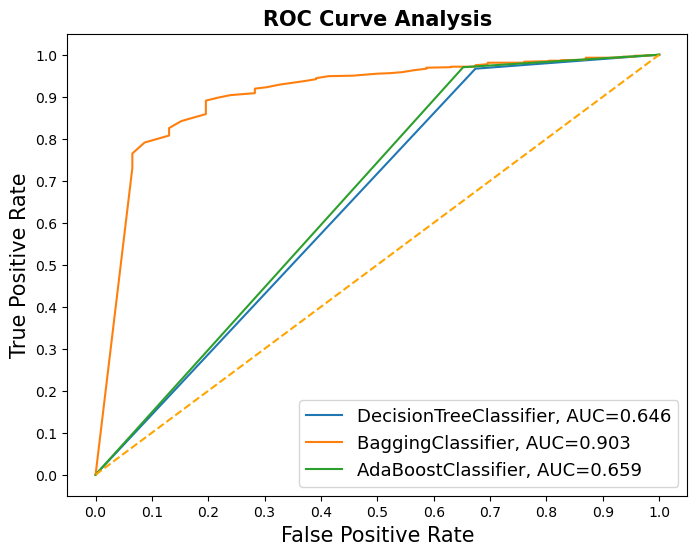

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classifiers and make a list
classifiers = [
    DecisionTreeClassifier(class_weight="balanced"), 
    BaggingClassifier(n_estimators=100),
    AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced'), algorithm="SAMME.R", n_estimators=100)
]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(features_train, target_train)
    target_predicted = model.predict_proba(features_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(target_test, target_predicted)
    auc = roc_auc_score(target_test, target_predicted)
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'fpr': fpr, 
                                        'tpr': tpr, 
                                        'auc': auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# Plot the ROC curves
fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

The ROC curve shows the comparative performance of the three classifiers I used (Decision Tree, Bagging, and AdaBoost) based on the AUC (Area Under the Curve) values.

- Bagging Classifier performs the best with an AUC of 0.903, indicating strong predictive power.
- AdaBoost Classifier has an AUC of 0.659, showing modest performance but better than random guessing.
- Decision Tree Classifier has the lowest AUC of 0.646, reflecting limited ability to distinguish between the classes.

Overall, the results suggest that the Bagging approach is significantly more effective, likely due to its aggregation of multiple trees to improve generalization. AdaBoost and Decision Tree are slightly better than random guessing but cannot be considered reliable models for this dataset.